In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/movie_preferences_dataset.csv")

In [ ]:
data.head()

,UserID,Age,Gender,Occupation,MovieID,MovieTitle,Genre,Rating,ReviewText,Timestamp
0,1,34.0,Female,Doctor,704,Triple-buffered systematic focus group,Action,4.041127,Act writer realize right tonight particularly ...,03-01-2024 20:46
1,2,36.0,Male,Teacher,659,Profound incremental workforce,Comedy,3.767150,Evidence American front. Deep major second bec...,08-01-2024 23:18
2,3,22.0,Other,Teacher,590,Synergistic intangible initiative,Action,1.780469,Keep exactly notice wear every. Box after stud...,31-05-2024 14:15
3,4,46.0,Female,Doctor,394,Monitored scalable collaboration,Comedy,2.238034,Trade full least method reach. Career provide ...,14-01-2024 06:59
4,5,37.0,Female,Engineer,142,Multi-layered exuding productivity,Sci-Fi,2.491655,White science social customer suddenly. Young ...,10-03-2024 01:35


In [ ]:
data.shape

(3000, 10)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
UserID,0
Age,150
Gender,0
Occupation,0
MovieID,0
MovieTitle,0
Genre,0
Rating,150
ReviewText,700
Timestamp,0


In [ ]:
data.fillna(data.Rating.mean(), inplace=True)

In [ ]:
data.fillna(data.Age.mean(), inplace=True)

In [ ]:
data.isnull().sum()

,0
UserID,0
Age,0
Gender,0
Occupation,0
MovieID,0
MovieTitle,0
Genre,0
Rating,0
ReviewText,0
Timestamp,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoding = LabelEncoder()
Genre_encoded = labelencoding.fit_transform(data.Genre)

In [ ]:
data.drop(columns=["Genre"], inplace=True)

In [ ]:
data.head()

,UserID,Age,Gender,Occupation,MovieID,MovieTitle,Rating,ReviewText,Timestamp
0,1,34.0,Female,Doctor,704,Triple-buffered systematic focus group,4.041127,Act writer realize right tonight particularly ...,03-01-2024 20:46
1,2,36.0,Male,Teacher,659,Profound incremental workforce,3.767150,Evidence American front. Deep major second bec...,08-01-2024 23:18
2,3,22.0,Other,Teacher,590,Synergistic intangible initiative,1.780469,Keep exactly notice wear every. Box after stud...,31-05-2024 14:15
3,4,46.0,Female,Doctor,394,Monitored scalable collaboration,2.238034,Trade full least method reach. Career provide ...,14-01-2024 06:59
4,5,37.0,Female,Engineer,142,Multi-layered exuding productivity,2.491655,White science social customer suddenly. Young ...,10-03-2024 01:35


In [ ]:
Genre_encoded

array([0, 1, 0, ..., 1, 5, 4])

In [ ]:
data['Genre_encoded'] = Genre_encoded.tolist()

In [ ]:
data.head()

,UserID,Age,Gender,Occupation,MovieID,MovieTitle,Rating,ReviewText,Timestamp,Genre_encoded
0,1,34.0,Female,Doctor,704,Triple-buffered systematic focus group,4.041127,Act writer realize right tonight particularly ...,03-01-2024 20:46,0
1,2,36.0,Male,Teacher,659,Profound incremental workforce,3.767150,Evidence American front. Deep major second bec...,08-01-2024 23:18,1
2,3,22.0,Other,Teacher,590,Synergistic intangible initiative,1.780469,Keep exactly notice wear every. Box after stud...,31-05-2024 14:15,0
3,4,46.0,Female,Doctor,394,Monitored scalable collaboration,2.238034,Trade full least method reach. Career provide ...,14-01-2024 06:59,1
4,5,37.0,Female,Engineer,142,Multi-layered exuding productivity,2.491655,White science social customer suddenly. Young ...,10-03-2024 01:35,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UserID         3000 non-null   int64  
 1   Age            3000 non-null   float64
 2   Gender         3000 non-null   object 
 3   Occupation     3000 non-null   object 
 4   MovieID        3000 non-null   int64  
 5   MovieTitle     3000 non-null   object 
 6   Rating         3000 non-null   float64
 7   ReviewText     3000 non-null   object 
 8   Timestamp      3000 non-null   object 
 9   Genre_encoded  3000 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 234.5+ KB


In [ ]:
X = data.iloc[ : , [6,9]].values

In [ ]:
X

array([[4.04112658, 0.        ],
       [3.76714971, 1.        ],
       [1.78046916, 0.        ],
       ...,
       [2.06079501, 1.        ],
       [3.21380615, 5.        ],
       [3.37781878, 4.        ]])

In [ ]:
data.shape

(3000, 10)

In [ ]:
from sklearn.cluster import KMeans
wcss = []

In [ ]:
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

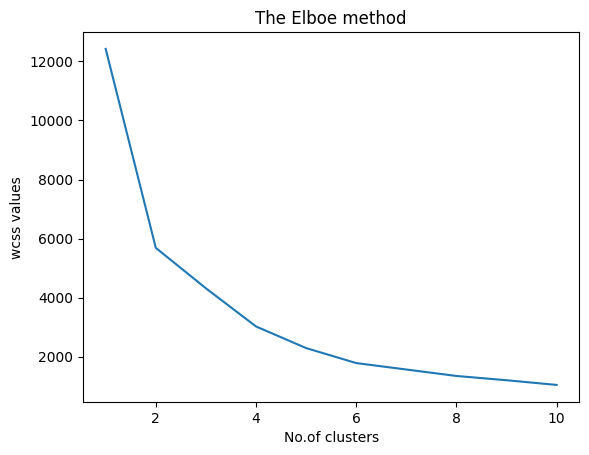

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elboe method')
plt.xlabel('No.of clusters')
plt.ylabel('wcss values')
plt.show()

In [ ]:
kmeanmodel = KMeans(n_clusters=4, init='k-means++', random_state=0)


In [ ]:
y_kmeans = kmeanmodel.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


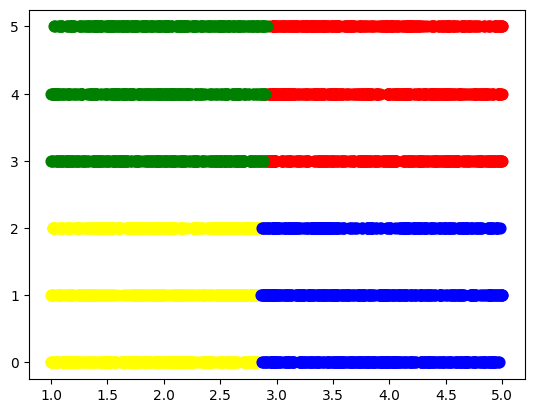

In [ ]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=60, c='red', label='Cluster1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=60, c='yellow', label='Cluster2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=60, c='blue', label='Cluster3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=60, c='green', label='Cluster4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c = 'magenta', label='centroids')